In [1]:
import json
from tqdm import tqdm

In [2]:
with open('/data/ephemeral/home/OCR/2024-01-24 17:52:11.623/annotations/instances.json') as f:
    ann = json.load(f)

In [8]:
image_name

'drp.en_ko.in_house.deepnatural_003743.jpg'

In [32]:
image_id_to_filename

{333033267: 'drp.en_ko.in_house.deepnatural_003743.jpg'}

In [33]:
ann['images']

[{'license': 'None',
  'file_name': 'drp.en_ko.in_house.deepnatural_003743.jpg',
  'url': 'None',
  'height': 1080,
  'width': 1440,
  'date_captured': '2024-01-24T08:52:44.489Z',
  'id': 333033267}]

In [44]:
ufo_format = {'images':{}}
image_name = ann['images'][0]['file_name']

for annotation in tqdm(ann['annotations']):
    # Image id
    image_id = annotation['image_id']
    
    # COCO 경계 상자 정보
    bbox = annotation['bbox']

    # UFO style
    tl = [bbox[0], bbox[1]]
    tr = [bbox[0] + bbox[2], bbox[1]]
    br = [bbox[0] + bbox[2], bbox[1] + bbox[3]]
    bl = [bbox[0], bbox[1] + bbox[3]]

    # UFO default key-value 
    if image_name not in ufo_format['images']:
        ufo_format['images'][image_name] = {
            "paragraphs": {},
            "words": {},
            "chars": {},
            "img_w": ann["images"][0]["width"],  # img_id가 1로 시작한다고 가정
            "img_h": ann["images"][0]["height"],  # img_id가 1로 시작한다고 가정
            "tags": ["autoannotated"], 
            "relations": {},
            "annotation_log": {
                "worker": "Dongho",
                "timestamp": "2024-01-24",
                "tool_version": "Supervisely",
                "source": None
                },
            "license_tag": {
                "usability": True,
                "public": False,
                "commercial": True,
                "type": None,
                "holder": "Upstage"
                }
            }

    ufo_format['images'][image_name]['words'][str(annotation['id']).zfill(4)] = {
        "transcription": "",  
        "points": [tl, tr, br, bl],
        "orientation": "Horizontal",
        "language": None,  
        "tags": ["Auto"],  
        "confidence": None,  
        "illegibility": False 
    }
    

100%|██████████| 370/370 [00:00<00:00, 202755.75it/s]


In [45]:
ufo_format

{'images': {'drp.en_ko.in_house.deepnatural_003743.jpg': {'paragraphs': {},
   'words': {'0001': {'transcription': '',
     'points': [[557.0, 77.0], [613.0, 77.0], [613.0, 108.0], [557.0, 108.0]],
     'orientation': 'Horizontal',
     'language': None,
     'tags': ['Auto'],
     'confidence': None,
     'illegibility': False},
    '0002': {'transcription': '',
     'points': [[627.0, 77.0], [709.0, 77.0], [709.0, 109.0], [627.0, 109.0]],
     'orientation': 'Horizontal',
     'language': None,
     'tags': ['Auto'],
     'confidence': None,
     'illegibility': False},
    '0003': {'transcription': '',
     'points': [[720.0, 73.0], [803.0, 73.0], [803.0, 105.0], [720.0, 105.0]],
     'orientation': 'Horizontal',
     'language': None,
     'tags': ['Auto'],
     'confidence': None,
     'illegibility': False},
    '0004': {'transcription': '',
     'points': [[817.0, 71.0], [902.0, 71.0], [902.0, 102.0], [817.0, 102.0]],
     'orientation': 'Horizontal',
     'language': None,
    

In [51]:
img_lists = ['drp.en_ko.in_house.deepnatural_003743.jpg']

In [55]:
import os
import json
from glob import glob
from pathlib import Path
from PIL import Image, ImageDraw

In [58]:
def save_vis_to_img(save_dir: str | os.PathLike = None, img_lists: list = None) -> None:
    if not os.path.exists(save_dir):
        os.makedirs(save_dir, exist_ok=True)    

    ori_dict = {
    "Horizontal": "ho",
    "Vertical": "ve",
    "Irregular": "ir"
    }

    lag_dict = {
    None: '0',
    'others': '1',
    'ko': '2',
    'en': '3',
    'ko, others': '4',
    'ko, en': '5',
    }

    tag_dict = {
    "occlusion": "occ",
    "stamp": "stamp",
    "masked": "mask",
    "inferred": "infer"
    }

    for i in range(len(img_lists)):
        img_json = [[k, v] for k, v in your_format_data['images'].items() if k == img_lists[i]]
        img_path = img_json[0][0]
        img = Image.open(os.path.join('data/medical/img/train', img_path)).convert("RGB")
        draw = ImageDraw.Draw(img)
        
        # All of the prepared dataset consists of words. Not a character.
        for obj_k, obj_v in img_json[0][1]['words'].items():
        # language
            lan = None
            if isinstance(obj_v['language'], list):
                lan = ', '.join(obj_v['language'])
            else:
                lan = obj_v['language']
                lan = lag_dict[lan]
            
            # orientation
            ori = ori_dict[obj_v['orientation']]
            
            # tag (occlusion, stamp, masked, inferred)
            tag = None
            for t in obj_v['tags']:
                try:
                    tag += tag_dict[t]
                except:
                    pass
        
            if tag is None:
                obj_name = f"{ori}_{obj_k}_{lan}"
            else:
                obj_name = f"{tag}_{ori}_{obj_k}_{lan}"
        
            # bbox points
            pts = [(int(p[0]), int(p[1])) for p in obj_v['points']]
            pt1 = sorted(pts, key=lambda x: (x[1], x[0]))[0]

        # Masking object which not use for training.    

            if obj_v['illegibility']:   
                draw.polygon(pts, fill=(0, 0, 0))   
            else:   
                draw.polygon(pts, outline=(255, 0, 0)) 
                draw.text(
                    (pt1[0]-3, pt1[1]-12),
                    obj_name,
                    fill=(0, 0, 0)
                    )
    #img.save(os.path.join(save_dir, img_path))
    return img

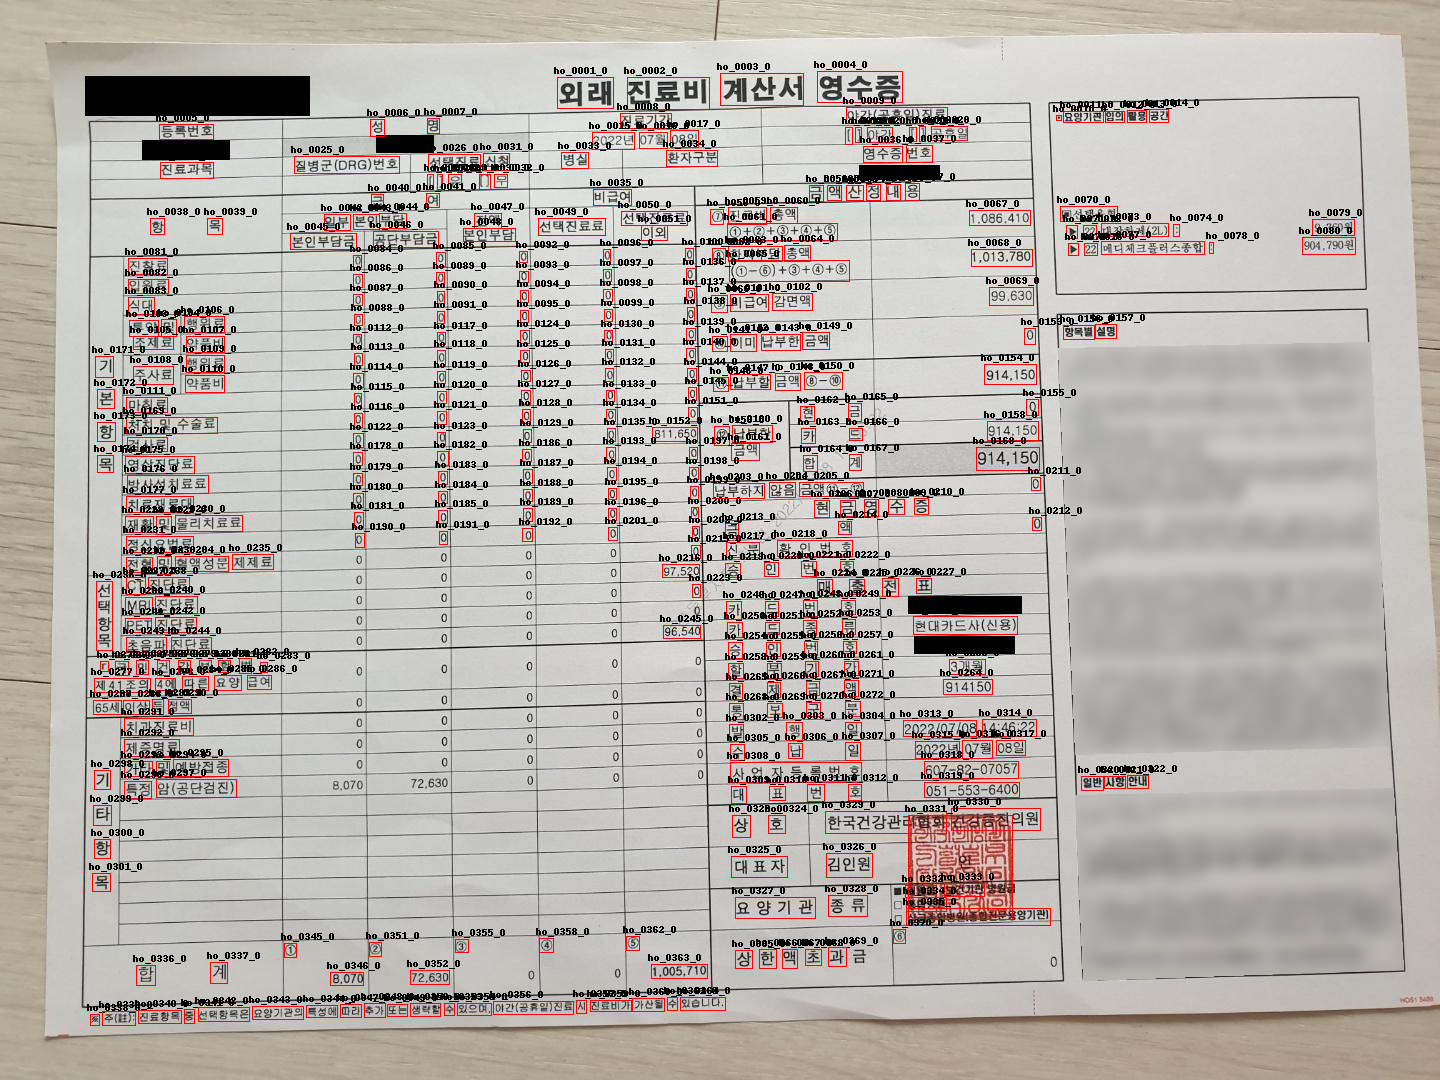

In [59]:
save_vis_to_img("vis_res", img_lists)